# Wprowadzenie do głębokiego uczenia w PyTorch

W tym notatniku zapoznasz się z [PyTorch](http://pytorch.org/), pakietem do tworzenia i trenowania sieci neuronowych. PyTorch na wiele sposobów zachowuje się jak tablice z Numpy, które nazywane są tutaj tensorami. PyTorch wykorzystuje  tensory i ułatwia przenoszenie ich na procesory graficzne w celu szybszego przetwarzania potrzebnego podczas uczenia sieci neuronowych. Zawiera również moduł, który automatycznie oblicza gradienty (dla propagacji wstecznej!) oraz inny moduł przeznaczony specjalnie do budowania sieci neuronowych.

## Sieć Neuronowa

Głębokie uczenie opiera się na sztucznych sieciach neuronowych, które istnieją w jakiejś formie od późnych lat pięćdziesiątych. Sieci są zbudowane z pojedynczych części aproksymujących neurony, zwykle nazywanych jednostkami lub po prostu „neuronami”. Każda jednostka ma pewną ilość ważonych wejść. Przeważone dane wejściowe są sumowane (przy pomocy kombinacji liniowej), a następnie przepuszczane przez funkcję aktywacji, w celu otrzymania danych wyjściowych. 

<img src="assets/simple_neuron.png" width=400px>

Formalnie wygląda to następująco: 

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
$$

W przypadku wektorów jest to iloczyn skalarny/wewnętrzny dwóch wektorów (ang. dot/inner product of two vectors):

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

## Tensory

Okazuje się, że obliczenia w sieciach neuronowych są tylko zbiorem operacji algebry liniowej na *tensorach*, uogólnieniu macierzy. Wektor jest tensorem jednowymiarowym, macierz jest tensorem dwuwymiarowym, tablica z trzema indeksami jest tensorem trójwymiarowym (na przykład kolorowe obrazy RGB). Podstawową strukturą danych dla sieci neuronowych są tensory, a PyTorch (podobnie jak prawie każdy inny framework do głębokiego uczenia się) jest zbudowany wokół tensorów. 

<img src="assets/tensor_examples.svg" width=600px>

Po omówieniu podstaw nadszedł czas, aby zbadać, w jaki sposób możemy wykorzystać PyTorch do zbudowania prostej sieci neuronowej. 

In [1]:
# First, import PyTorch
import torch

In [2]:
def activation(x):
    """ Sigmoid activation function 
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

In [3]:
### Generowanie danych
torch.manual_seed(7) # Ustawienie ziarna

# Losujemy 5 zmiennych (wektor danych wejściowych)
features = torch.randn((1, 5))
# Losujemy wagi dla naszych danych wejściowych
weights = torch.randn_like(features)
# i bias
bias = torch.randn((1, 1))

Powyżej wygenerowaliśy dane, które możemy wykorzystać do uzyskania wyniku naszej prostej sieci. Na razie to wszystko jest po prostu losowe, w przyszłości zaczniemy używać normalnych danych. Analizując każdą powyższą linię:

`features = torch.randn((1, 5))` tworzy tensor o wymiarach `(1, 5)`, jednym wierszu i pięciu kolumnach, który zawiera losowe wartości z rozkładu normalnego (średnia 0 i odchylenie standardowe 1). 

`weights = torch.randn_like(features)` tworzy losowy tensor o wymiarach tensora `features`, również używając rozkładu normalnego.

Ostatecznie, `bias = torch.randn((1, 1))` losuje pojedynczą wartość z rozkładu normalnego. 

Tensory PyTorch można dodawać, mnożyć, odejmować itp., podobnie jak tablice Numpy. Ogólnie rzecz biorąc, będziemy używać tensorów PyTorch w taki sam sposób, w jaki używa się tablic Numpy. Mają one jednak kilka fajnych korzyści, takich jak przyspieszenie GPU, do którego przejdziemy później. Na razie użyj wygenerowanych danych, aby obliczyć dane wyjściowe tej prostej sieci jednowarstwowej.
> **Ćwiczenie**: oblicz wyjście sieci za pomocą danych wejściowych „features”, wag „weights” i wyrazu wolnego „bias”. Podobnie jak Numpy, PyTorch ma funkcję [`torch.sum()`](https://pytorch.org/docs/stable/torch.html#torch.sum), a także metodę `.sum()` na tensorach, do liczenia sum. Użyj funkcji „activation” zdefiniowanej powyżej jako funkcji aktywacji. 

In [4]:
## Oblicz wynik tej sieci za pomocą wag i tensorów odchylenia 

w = activation(weights * features + bias)

r = torch.sum(w)

In [5]:
features.shape

torch.Size([1, 5])

In [6]:
weights.shape

torch.Size([1, 5])

In [7]:
torch.mm(features, weights)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x5 and 1x5)

Możesz wykonać mnożenie i sumowanie w tej samej operacji, używając mnożenia macierzy. Ogólnie rzecz biorąc warto używać mnożenia macierzy, ponieważ są one bardziej wydajne i przyspieszane przy użyciu nowoczesnych bibliotek i obliczeń o wysokiej wydajności na procesorach graficznych.

Tutaj chcemy wykonać macierzowe pomnożenie cech i wag. W tym celu możemy użyć [`torch.mm()`](https://pytorch.org/docs/stable/torch.html#torch.mm) lub [`torch.matmul()`](https:// pytorch.org/docs/stable/torch.html#torch.matmul), który jest nieco bardziej skomplikowany i obsługuje rozgłoszenia (ang. broadcasting). Jeśli spróbujesz użyć tej funkcji z `features` i `weights` w takiej formie w jakiej są otrzymasz błąd.

Powstały błąd jest wynikiem tego, że nasze tensory nie mają odpowiednich wymiarów do mnożenia macierzy. Pamiętaj, że w przypadku mnożenia macierzy liczba kolumn w pierwszym tensorze musi być równa liczbie wierszy w drugim.  Tensory `features` oraz `weights` mają ten sam wymiar, `(1, 5)`. Oznacza to, że musimy zmienić kształt `weights` aby mnożenie macierzy zadziałało. 

**Uwaga:** aby zobaczyć kształt tensora o nazwie `tensor`, użyj `tensor.shape`. Jeśli budujesz sieci neuronowe, będziesz często używać tej metody. 

Mamy kilka możliwości: [`weights.reshape()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.reshape), [`weights.resize_()`]( https://pytorch.org/docs/stable/tensors.html#torch.Tensor.resize_) i [`weights.view()`](https://pytorch.org/docs/stable/tensors.html# torch.tensor.view).

* `weights.reshape(a, b)` zwróci nowy tensor z tymi samymi danymi co `weights` o rozmiarze `(a, b)` czasami, a czasami klon, ponieważ kopiuje dane do innej części pamięć.
* `weights.resize_(a, b)` zwraca ten sam tensor o innym kształcie. Jeśli jednak nowy kształt da w wyniku mniej elementów niż oryginalny tensor, niektóre elementy zostaną usunięte z tensora (ale nie z pamięci). Jeśli nowy kształt da w wyniku więcej elementów niż oryginalny tensor, nowe elementy nie zostaną zainicjowane w pamięci. W tym miejscu można zauważyć, że podkreślenie na końcu metody oznacza, że ​​metoda ta jest wykonywana **w miejscu**. Oto świetny wątek na forum, aby [przeczytać więcej o operacjach w miejscu](https://discuss.pytorch.org/t/what-is-in-place-operation/16244) w PyTorch.
* `weights.view(a, b)` zwróci nowy tensor z takimi samymi danymi jak `weights` o rozmiarze `(a, b)`.

Zwykle używa się `.view()`, ale każda z trzech metod będzie działać. Tak więc, teraz możemy zmienić kształt `weights`, aby mieć pięć wierszy i jedną kolumnę za pomocą komendy `weights.view(5, 1)`.

> **Ćwiczenie**: Oblicz wynik naszej małej sieci za pomocą mnożenia macierzy. 

In [8]:
## Wyliczenie wyjścia sieci przy pomocy mnożenia macierzy
y = torch.mm(features, weights.view(5,1))
y

tensor([[-1.9796]])

### Układanie neuronów w stos

Łącząc neuronwy w stos możemy zobaczyć prawdziwą moc algorytmu pojawia. W tym celu lączymy pojedyncze jednostki w warstwy i stosy warstw w sieć neuronów. Wyjście jednej warstwy neuronów staje się wejściem dla następnej warstwy. Przy wielu jednostkach wejściowych i jednostkach wyjściowych musimy teraz wyrazić wagi jako macierz. 

<img src='assets/multilayer_diagram_weights.png' width=450px>

Pierwsza warstwa pokazana na dole to dane wejściowe, co zrozumiałe nazywa się **warstwą wejściową**. Warstwa środkowa to **warstwa ukryta**, a warstwa końcowa (po prawej) to **warstwa wyjściowa**. Możemy ponownie wyrazić tę sieć matematycznie za pomocą macierzy i użyć mnożenia macierzy, aby uzyskać kombinacje liniowe dla każdej jednostki w jednej operacji. Na przykład można obliczyć ukrytą warstwę ($h_1$ i $h_2$) 

$$
\vec{h} = [h_1 \, h_2] = 
\begin{bmatrix}
x_1 \, x_2 \cdots \, x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_{11} & w_{12} \\
           w_{21} &w_{22} \\
           \vdots &\vdots \\
           w_{n1} &w_{n2}
\end{bmatrix}
$$

Dane wyjściowe dla tej małej sieci można znaleźć, traktując ukrytą warstwę jako dane wejściowe dla jednostki wyjściowej. Dane wyjściowe sieci są wyrażane w prosty sposób 

$$
y =  f_2 \! \left(\, f_1 \! \left(\vec{x} \, \mathbf{W_1}\right) \mathbf{W_2} \right)
$$

In [9]:
### Generowanie danych
torch.manual_seed(7) # Ustaw ziarno

# Wylosowanie wektora 3 cech
features = torch.randn((1, 3))

# Określenie rozmiaru każdej warstwy w naszej sieci 
n_input = features.shape[1]     # Ilość neuronów wejściowych, musi być zgodna z wielkością wektora wejściowego
n_hidden = 2                    # Ilość neuronów ukrytych
n_output = 1                    # Ilośc neuronów wyjściowych

# Wagi dla sygnałów przechodzących z wejścia do ukrytej warstwy 
W1 = torch.randn(n_input, n_hidden)
# Wagi dla sygnałów przechodzących z warstwy ukrytej do warstwy wyjściowej 
W2 = torch.randn(n_hidden, n_output)

# i bias dla warstwy ukrytej i wyjściowej 
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

> **Ćwiczenie:** Oblicz wynik dla tej sieci wielowarstwowej wykorzystując wagi  `W1` & `W2` i biasów, `B1` & `B2`. 

In [10]:
## Miejsce na rozwiązanie
Whx = activation(torch.mm(features, W1) + B1)
Why = activation(torch.mm(Whx, W2) + B2)

Why

tensor([[0.3171]])

Poprawny wynik wynosi  `tensor([[ 0.3171]])`.

Liczba jednostek ukrytych to parametr sieci, często nazywany **hiperparametrem** w celu odróżnienia go od parametrów wag i odchyleń. Jak zobaczysz później, gdy będziemy omawiać uczenie sieci neuronowej, im więcej ukrytych jednostek ma sieć i im więcej warstw, tym lepiej jest w stanie uczyć się na podstawie danych i dokonywać dokładnych prognoz. 

## Numpy do Torch i z powrotem

PyTorch ma świetną funkcję do konwersji między tablicami Numpy i tensorami Torch. Aby utworzyć tensor z tablicy Numpy, użyj `torch.from_numpy()`. Aby przekonwertować tensor na tablicę Numpy, użyj metody `.numpy()`. 

In [11]:
import numpy as np
a = np.random.rand(4,3)
a

array([[0.94830006, 0.04281766, 0.39272678],
       [0.73669471, 0.39496956, 0.21414976],
       [0.31792966, 0.58949968, 0.86949089],
       [0.28563749, 0.09882535, 0.29148487]])

In [12]:
b = torch.from_numpy(a)
b

tensor([[0.9483, 0.0428, 0.3927],
        [0.7367, 0.3950, 0.2141],
        [0.3179, 0.5895, 0.8695],
        [0.2856, 0.0988, 0.2915]], dtype=torch.float64)

In [13]:
b.numpy()

array([[0.94830006, 0.04281766, 0.39272678],
       [0.73669471, 0.39496956, 0.21414976],
       [0.31792966, 0.58949968, 0.86949089],
       [0.28563749, 0.09882535, 0.29148487]])

Pamięć jest dzielona między tablicę Numpy i tensor Torch, więc jeśli zmienisz wartości w miejscu jednego obiektu, drugi również się zmieni. 

In [14]:
# Pomnóż tensor PyTorch przez 2
b.mul_(2)

tensor([[1.8966, 0.0856, 0.7855],
        [1.4734, 0.7899, 0.4283],
        [0.6359, 1.1790, 1.7390],
        [0.5713, 0.1977, 0.5830]], dtype=torch.float64)

In [15]:
# Tablica Numpy pasuje do nowych wartości Tensora 
a

array([[1.89660013, 0.08563532, 0.78545356],
       [1.47338943, 0.78993911, 0.42829952],
       [0.63585932, 1.17899936, 1.73898177],
       [0.57127498, 0.1976507 , 0.58296974]])

# Sieci neuronowe z PyTorch 

Sieci uczenia głębokiego są zwykle ogromne i składają się z dziesiątek lub setek warstw, stąd termin „głęboki”. Możesz zbudować jedną z tych głębokich sieci, używając tylko macierzy wag, tak jak to zrobiliśmy poprzednio, ale generalnie jest to bardzo kłopotliwe i trudne do zaimplementowania. PyTorch posiada moduł `nn`, który zapewnia dobry sposób na wydajne budowanie dużych sieci neuronowych. 

In [16]:
# Import wymaganych pakietów

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

Teraz zbudujemy większą sieć, która może rozwiązać (wcześniej) trudny problem, identyfikując tekst na obrazie. Tutaj użyjemy zestawu danych MNIST, który składa się z odręcznych cyfr w skali szarości. Każdy obraz ma wymiary 28x28 pikseli. Poniżej przykładowa próbka danych

<img src='assets/mnist.png'>

Naszym celem jest zbudowanie sieci neuronowej, która może wziąć jeden z tych obrazów i przewidzieć cyfrę na nim zapisaną.

Najpierw musimy pobrać nasz zestaw danych. Zapewnia to pakiet `torchvision`. Poniższy kod pobierze zestaw danych MNIST, a następnie utworzy dla nas zestawy danych treningowych i testowych. 

In [3]:
### Uruchom blok

from torchvision import datasets, transforms

# Zdefiniuj transformację, aby znormalizować dane 
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Pobierz i załaduj dane treningowe 
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Mamy dane treningowe załadowane do `trainloader` i robimy z niego iterator za pomocą `iter(trainloader)`. Później użyjemy tego, aby przejść przez zbiór danych do treningu, na przykład

```python
for image, label in trainloader:
    ## rób rzeczy z obrazami i etykietami
```

Zauważysz, że stworzyliśmy `trainloader` z wielkością partii 64 i `shuffle=True`. Rozmiar partii/wsadu (batcha) to liczba obrazów, które otrzymujemy w jednej iteracji z modułu ładującego dane i przechodzimy przez naszą sieć. A `shuffle=True` mówi, aby tasował zestaw danych za każdym razem, gdy zaczynamy ponownie przechodzić przez program ładujący dane. Ale tutaj po prostu chwytam pierwszą partię, abyśmy mogli sprawdzić dane. Jak widać poniżej, `images` to tensor o rozmiarze `(64, 1, 28, 28)`. Tak więc 64 obrazy na partię, 1 kanał koloru i rozmiar obrazu 28x28. 

In [4]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


Tak wygląda jeden z obrazów. 

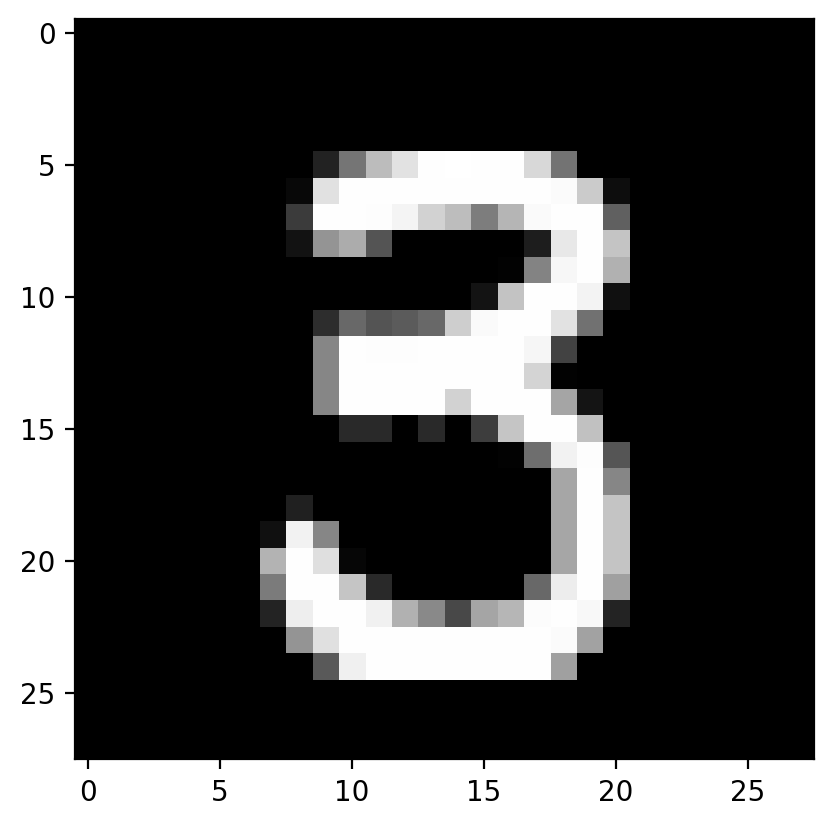

In [19]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

Najpierw spróbujmy zbudować prostą sieć dla tego zbioru danych, używając macierzy wag i mnożenia macierzy. Następnie zobaczymy, jak to zrobić za pomocą modułu `nn` PyTorch, który zapewnia znacznie wygodniejszą i wydajniejszą metodę definiowania architektur sieciowych.

Sieci, które były prezentowane do tej pory, nazywają się *w pełni połączonymi* lub *gęstymi* sieciami. Każda jednostka w jednej warstwie jest połączona z każdą jednostką w następnej warstwie. W całkowicie połączonych sieciach dane wejściowe do każdej warstwy muszą być jednowymiarowym wektorem (który można ułożyć w tensor 2D jako partię wielu przykładów). Jednak nasze obrazy to 28x28 tensory 2D, więc musimy je przekonwertować na wektory 1D. Myśląc o rozmiarach, musimy przekonwertować partię obrazków o kształcie `(64, 1, 28, 28)` na kształt `(64, 784)`, 784 to 28 razy 28. Zwykle nazywa się to *flattening*, spłaszczyliśmy obrazy 2D do wektorów 1D.

Wcześniej budowaliśmy sieć z jedną jednostką wyjściową. Tutaj potrzebujemy 10 jednostek wyjściowych, po jednej dla każdej cyfry. Chcemy, aby nasza sieć przewidziała cyfrę pokazaną na obrazku, więc obliczymy prawdopodobieństwa, że ​​obraz ma jedną cyfrę lub klasę. To kończy się dyskretnym rozkładem prawdopodobieństwa na klasy (cyfry), który mówi nam o najbardziej prawdopodobnej klasie obrazu. Oznacza to, że potrzebujemy 10 jednostek wyjściowych dla 10 klas (cyfr). Zobaczymy, jak przekonwertować wynik sieciowy na rozkład prawdopodobieństwa.

> **Ćwiczenie:** spłaszcz partię obrazów „images”. Następnie zbuduj wielowarstwową sieć z 784 jednostkami wejściowymi, 256 jednostkami ukrytymi i 10 jednostkami wyjściowymi, używając losowych tensorów dla wag i obciążeń. Na razie użyj sigmoidalnej funkcji aktywacji dla ukrytej warstwy. Pozostaw warstwę wyjściową bez aktywacji, dodamy taką, która da nam rozkład prawdopodobieństwa.

In [20]:
import torch.nn as nn
## Twoje rozwiązanie
def activation(x):
    return 1/(1+torch.exp(-x))

flatten = nn.Flatten()
features = flatten(images)

n_input = features.shape[1]     # Ilość neuronów wejściowych, musi być zgodna z wielkością wektora wejściowego
n_hidden = 256                  # Ilość neuronów ukrytych
n_output = 10                   # Ilośc neuronów wyjściowych

W1 = torch.randn(n_input, n_hidden)
W2 = torch.randn(n_hidden, n_output)

B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))
    
Whx = activation(torch.mm(features, W1) + B1)
Why = activation(torch.mm(Whx, W2) + B2)

Why.shape
# wyjście Twojej sieci powinno mieć kształt  (64,10)

torch.Size([64, 10])

Teraz mamy sieć z 10 wyjściami. Chcemy przekazać obraz do naszej sieci i uzyskać rozkład prawdopodobieństwa w klasach, który mówi nam o prawdopodobieństwie z jakim przypisalibyśmy obraz do danej klasy. Wyglądać to będzie tak:
<img src='assets/image_distribution.png' width=500px>

Widzimy, że prawdopodobieństwo dla każdej klasy jest mniej więcej takie samo. Reprezentuje to sieć niewytrenowaną, która nie widziała jeszcze żadnych danych, więc po prostu zwraca jednolitą dystrybucję z równymi prawdopodobieństwami dla każdej klasy.

Aby obliczyć ten rozkład prawdopodobieństwa, często używamy [funkcji **softmax**](https://en.wikipedia.org/wiki/Softmax_function). Opisana jest ona następującym równaniem:

$$
\Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}}
$$

To, co robi, to skaluje każde wejście $x_i$ między 0 a 1 i normalizuje wartości, aby uzyskać właściwy rozkład prawdopodobieństwa, w którym prawdopodobieństwa sumują się do jednego.

> **Ćwiczenie:** Zaimplementuj funkcję `softmax`, która wykonuje obliczenia softmax i zwraca rozkłady prawdopodobieństwa dla każdego przykładu w partii. Pamiętaj, że podczas wykonywania tej czynności musisz zwracać uwagę na kształty. Jeśli masz tensor `a` o kształcie `(64, 10)` i tensor `b` o kształcie `(64,)`, wykonanie `a/b` da ci błąd, ponieważ PyTorch spróbuje wykonać podział na kolumny (tzw. rozgłaszanie), ale otrzymasz niezgodność rozmiaru. Sposób myślenia o tym jest taki, że dla każdego z 64 przykładów chcesz podzielić tylko przez jedną wartość, sumę w mianowniku. Musisz więc `b` mieć w rozmiarze `(64, 1)`. W ten sposób PyTorch podzieli 10 wartości w każdym wierszu `a` przez jedną wartość w każdym wierszu `b`. Zwróć również uwagę na to, jaką bierzesz sumę. Musisz zdefiniować wymiar `dim` po którym sumujesz `torch.sum`. Ustawienie `dim=0` powoduje wyznaczenie sumy w wierszy, a `dim=1` kolumn.

In [21]:
torch.sum(torch.exp(Why), dim=1).view(64,1)

tensor([[12.4543],
        [14.0399],
        [15.6889],
        [17.0876],
        [15.7748],
        [15.0760],
        [15.5452],
        [18.1084],
        [14.5636],
        [12.1056],
        [13.4510],
        [12.9508],
        [18.2560],
        [15.3718],
        [16.9756],
        [13.5189],
        [13.9343],
        [19.1256],
        [15.1089],
        [19.3441],
        [17.5144],
        [15.5068],
        [15.7190],
        [15.7923],
        [14.6779],
        [17.3039],
        [16.8244],
        [15.6675],
        [13.3755],
        [16.5081],
        [15.1201],
        [16.2007],
        [18.4347],
        [13.0772],
        [13.3234],
        [16.6217],
        [20.0367],
        [16.1778],
        [15.7310],
        [15.6055],
        [17.0848],
        [16.5489],
        [14.1911],
        [16.5382],
        [15.0867],
        [19.4835],
        [13.9839],
        [19.2850],
        [16.1379],
        [14.9589],
        [17.6232],
        [16.4617],
        [15.

In [22]:
def softmax(x):
    ## TODO: Zaimplementuj funkcję softmax
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(64,1)

# W tym miejscu out to wyjście sieci z poprzedniego ćwiczenia o rozmiarze (64,10)
probabilities = softmax(Why)

# Sprawdźmy czy rozmiar jest właściwy. Powinien być (64, 10)
print(probabilities.shape)
# Czy prawdopodobieństwa sumują się do 1?
print(torch.sum(probabilities[0]))

torch.Size([64, 10])
tensor(1.0000)


In [23]:
print(probabilities[0])

tensor([0.0803, 0.0803, 0.1385, 0.0803, 0.2119, 0.0833, 0.0803, 0.0805, 0.0803,
        0.0843])


## Budowanie sieci za pomocą PyTorch

PyTorch dostarcza moduł `nn`, który znacznie upraszcza budowanie sieci. Tutaj pokażemy, jak zbudować taką samą architekturę, jak powyżej, z 784 wejściami, 256 ukrytymi jednostkami, 10 jednostkami wyjściowymi i wyjściem softmax. 

In [24]:
from torch import nn

In [25]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Dane wejściowe do transformacji liniowej warstwy ukrytej 
        self.hidden = nn.Linear(784, 256)
        # Warstwa wyjściowa, 10 neuronów - jeden na każdą cyfrę 
        self.output = nn.Linear(256, 10)
        
        # Zdefiniuj aktywację sigmoidalną i wyjście softmax 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Przekaż tensor wejściowy przez każdą z naszych operacji 
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [26]:
# Utwórz sieć i spójrz na jej reprezentację tekstową 
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

Możesz zdefiniować sieć nieco bardziej zwięźle i przejrzyście za pomocą modułu `torch.nn.functional`. Jest to najczęstszy sposób, w jaki definiuje się sieci, ponieważ wiele operacji to proste funkcje oparte na podstawowych elementach. Normalnie importujemy ten moduł jako `F`, `import torch.nn.functional as F`. 

In [27]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Dane wejściowe do transformacji liniowej warstwy ukrytej
        self.hidden = nn.Linear(784, 256)
        # Warstwa wyjściowa, 10 neuronów - jeden na każdą cyfrę
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Warstwa ukryta z sigmoidalną funkcją aktywacji
        x = F.sigmoid(self.hidden(x))
        # Warstwa wyjściowa z funkcją aktywacji softmax
        x = F.softmax(self.output(x), dim=1)
        
        return x

### Funkcje aktywacji

Do tej pory przyglądaliśmy się tylko sigmoidalnej funkcji aktywacji, ale ogólnie każda funkcja może być używana jako funkcja aktywacji. Jedynym wymaganiem jest to, że aby sieć mogła aproksymować funkcję nieliniową, funkcje aktywacji muszą być nieliniowe. Oto kilka innych przykładów typowych funkcji aktywacji: Tanh (tangens hiperboliczny) i ReLU (rektyfikowana jednostka liniowa).

<img src="assets/activation.png" width=700px>

W praktyce funkcja ReLU jest wykorzystywana prawie wyłącznie jako funkcja aktywacji dla warstw ukrytych. 

### Twoja kolej na zbudowanie sieci

<img src="assets/mlp_mnist.png" width=600px>

> **Ćwiczenie:** Utwórz sieć z 784 jednostkami wejściowymi, warstwą ukrytą z 128 jednostkami i aktywacją ReLU, następnie warstwę ukrytą z 64 jednostkami i aktywacją ReLU, a na koniec warstwę wyjściową z aktywacją softmax, jak pokazano powyżej. Możesz użyć aktywacji ReLU z modułem `nn.ReLU` lub funkcją `F.relu`.

Dobrą praktyką jest nazywanie warstw według ich typu sieci, na przykład 'fc', aby reprezentować w pełni połączoną warstwę. Podczas kodowania rozwiązania użyj `fc1`, `fc2` i `fc3` jako nazw warstw. 

In [28]:
## Miejsce na rozwiązanie
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

### Inicjowanie wag i odchyleń

Wagi i tym podobne są automatycznie inicjowane, ale można dostosować sposób ich inicjowania. Wagi i obciążenia to tensory dołączone do zdefiniowanej warstwy, można je uzyskać na przykład za pomocą `model.fc1.weight`. 

In [29]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0303,  0.0047, -0.0060,  ...,  0.0235,  0.0012, -0.0335],
        [ 0.0141,  0.0220,  0.0141,  ..., -0.0081,  0.0335, -0.0211],
        [-0.0301, -0.0065,  0.0150,  ...,  0.0091, -0.0224, -0.0060],
        ...,
        [ 0.0126,  0.0191,  0.0257,  ..., -0.0219,  0.0255, -0.0272],
        [ 0.0334, -0.0019, -0.0155,  ..., -0.0205,  0.0314, -0.0051],
        [-0.0152,  0.0289,  0.0296,  ..., -0.0032,  0.0309,  0.0017]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0203, -0.0101,  0.0036, -0.0251, -0.0256, -0.0087,  0.0092, -0.0355,
         0.0127, -0.0146, -0.0254, -0.0126, -0.0269,  0.0212,  0.0112, -0.0237,
         0.0278,  0.0016, -0.0003,  0.0029, -0.0072,  0.0156,  0.0173, -0.0053,
         0.0148,  0.0055,  0.0167, -0.0079,  0.0071,  0.0239,  0.0309,  0.0081,
         0.0260,  0.0178, -0.0177,  0.0286, -0.0192,  0.0316, -0.0331, -0.0061,
        -0.0203, -0.0219,  0.0069, -0.0191,  0.0133, -0.0211,  0.0017,  0.0135,
        -0.0236

W przypadku niestandardowej inicjalizacji chcemy zmodyfikować te tensory na miejscu. W rzeczywistości są to *Zmienne* autogradientu, więc musimy odzyskać rzeczywiste tensory za pomocą `model.fc1.weight.data`. Kiedy już mamy tensory, możemy wypełnić je zerami (dla błędów systematycznych) lub losowymi wartościami normalnymi. 

In [30]:
# Ustawiamy biasy na zero
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
# Losujemy wagi z rozkładu normalnego dla odchylenia standardowego = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0044,  0.0075, -0.0091,  ..., -0.0029, -0.0191, -0.0109],
        [-0.0039,  0.0115,  0.0018,  ...,  0.0032, -0.0116,  0.0238],
        [ 0.0001, -0.0048, -0.0022,  ..., -0.0073,  0.0073, -0.0150],
        ...,
        [ 0.0003, -0.0006,  0.0089,  ..., -0.0065,  0.0105, -0.0093],
        [ 0.0069, -0.0074,  0.0049,  ..., -0.0027,  0.0132,  0.0289],
        [ 0.0017,  0.0128, -0.0048,  ..., -0.0103, -0.0042, -0.0028]])

### Propagacja w przodu

Teraz, gdy mamy sieć, zobaczmy, co się dzieje, gdy przechodzimy przez nią obraz podanym na wejście. 

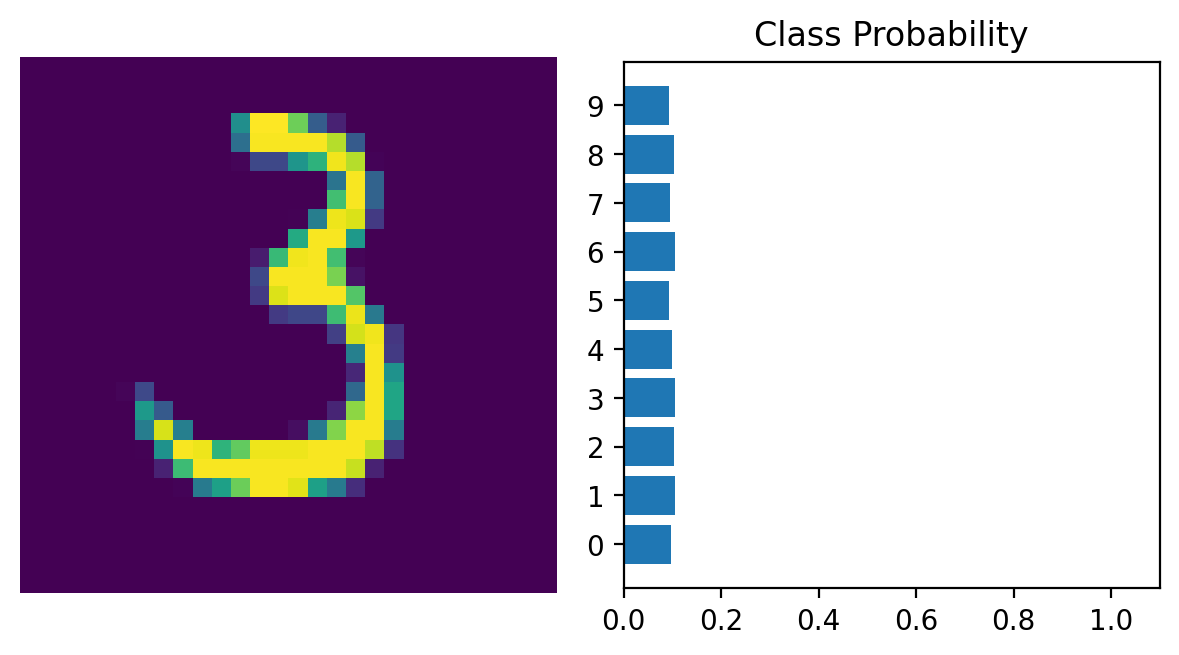

In [32]:
# Zbież partię danych 
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Zmień rozmiar obrazów na wektor 1D, nowy kształt to (rozmiar wsadu, kanały kolorów, piksele obrazu) 
images.resize_(64, 1, 784)
# lub images.resize_(images.shape[0], 1, 784) aby automatycznie uzyskać rozmiar partii

# Przekazywanie przez sieć 
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

Jak widać powyżej, nasza sieć w zasadzie nie ma pojęcia, co to za cyfra. To dlatego, że jeszcze tego nie trenowaliśmy, wszystkie ciężary są losowe!

### Używanie `nn.Sequential`

PyTorch zapewnia wygodny sposób budowania takich sieci, w których tensor jest przekazywany sekwencyjnie przez operacje `nn.Sequential` ([dokumentacja](https://pytorch.org/docs/master/nn.html#torch.nn.Sequential )). Używaj jej do zbudowania równoważnej sieci: 

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


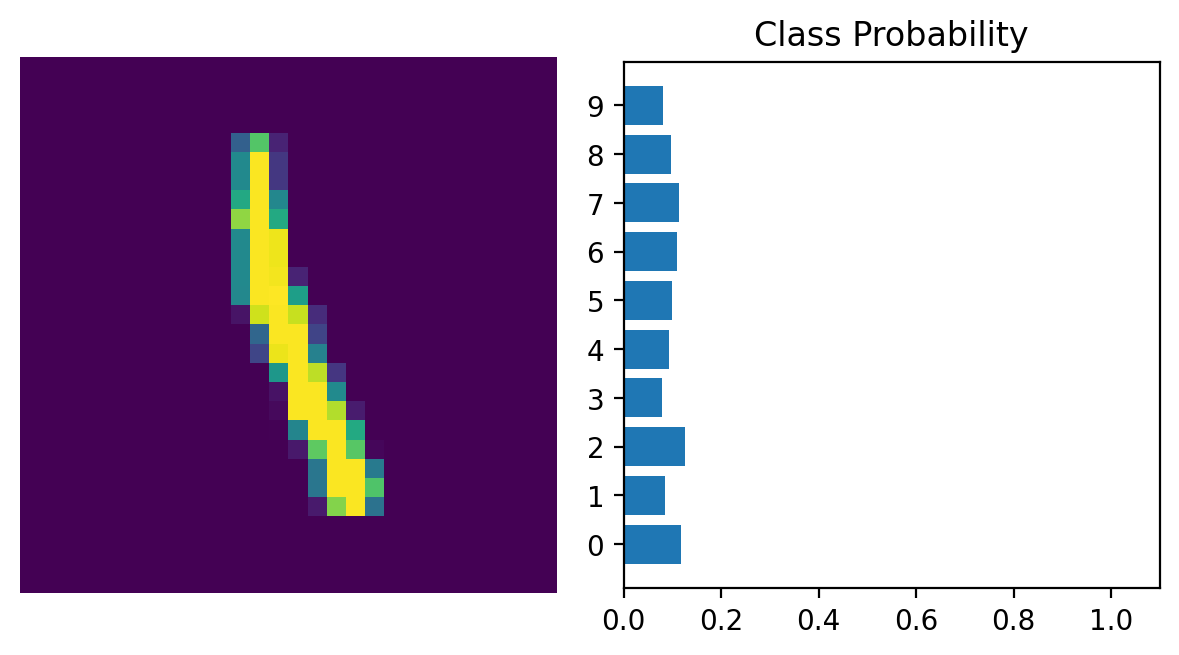

In [33]:
# Hiperparametery sieci
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Buduj feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Przekazywanie dalej przez sieć i wyświetlanie danych wyjściowych 
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

Tutaj nasz model jest taki sam jak poprzednio: 784 jednostki wejściowe, warstwa ukryta z 128 jednostkami, aktywacja ReLU, ukryta warstwa 64 jednostek, kolejne ReLU, następnie warstwa wyjściowa z 10 jednostkami i wyjście softmax.

Operacje są dostępne po przekazaniu odpowiedniego indeksu. Na przykład, jeśli chcesz uzyskać pierwszą operację liniową i spojrzeć na wagi, użyjesz `model[0]`. 

In [34]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0026,  0.0080,  0.0260,  ...,  0.0217,  0.0317, -0.0096],
        [ 0.0108,  0.0118, -0.0082,  ...,  0.0040, -0.0005,  0.0038],
        [ 0.0108, -0.0025,  0.0052,  ..., -0.0143,  0.0148,  0.0338],
        ...,
        [-0.0324, -0.0356,  0.0314,  ...,  0.0274, -0.0233, -0.0136],
        [-0.0095,  0.0325,  0.0225,  ...,  0.0056,  0.0022,  0.0118],
        [-0.0028,  0.0075,  0.0171,  ..., -0.0240, -0.0354,  0.0122]],
       requires_grad=True)

Możesz również przekazać `OrderedDict`, aby nazwać poszczególne warstwy i operacje, zamiast używać przyrostowych liczb całkowitych. Zauważ, że klucze słownika muszą być unikalne, więc _każda operacja musi mieć inną nazwę_. 

In [35]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Teraz możesz uzyskać dostęp do warstw za pomocą liczby całkowitej lub nazwy 

In [36]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)


# Trenowanie sieci neuronowej

Sieć, którą zbudowaliśmy w poprzedniej części, nie jest tak sprytna, nie wie nic o naszych odręcznych cyfrach. Sieci neuronowe z nieliniowymi aktywacjami działają jak uniwersalne aproksymatory funkcji. Istnieje pewna funkcja, która mapuje dane wejściowe na dane wyjściowe. Na przykład obrazy odręcznych cyfr do prawdopodobieństw klas. Siła sieci neuronowych polega na tym, że możemy nauczyć je przybliżać tę funkcję i w zasadzie każdą funkcję, mając wystarczającą ilość danych i czasu obliczeniowego.

<img src="assets/function_approx.png" width=500px>

Początkowo sieć jest naiwna, nie zna funkcji mapującej wejścia na wyjścia. Szkolimy sieć, pokazując jej przykłady z rzeczywistych danych, a następnie dostosowując parametry sieci tak, aby aproksymowała tę funkcję.

Aby znaleźć te parametry, musimy wiedzieć, jak słabo sieć przewiduje rzeczywiste wyniki. W tym celu obliczamy **funkcję straty** (zwaną również kosztem), będącą miarą naszego błędu przewidywania. Na przykład średnia kwadratowa strata jest często używana w problemach regresji i klasyfikacji binarnej

$$
\large \ell = \frac{1}{2n}\sum_i^n{\left(y_i - \hat{y}_i\right)^2},
$$

gdzie $n$ to liczba przykładów uczących, $y_i$ to etykiety prawdziwe, a $\hat{y}_i$ to etykiety przewidywane.

Minimalizując tę stratę w odniesieniu do parametrów sieci, możemy znaleźć konfiguracje, w których strata jest minimalna, a sieć jest w stanie przewidzieć prawidłowe etykiety z dużą dokładnością. Znajdujemy to minimum za pomocą procesu zwanego **spadkiem gradientu**. Gradient jest nachyleniem funkcji straty i wskazuje kierunek najszybszej zmiany. Aby w jak najkrótszym czasie dojść do minimum, chcemy podążać za gradientem (w dół). Można to potraktować jak zejście z góry, podążając po najbardziej stromym zboczu do podstawy.

<img src='assets/gradient_descent.png' width=350px>

## Propagacja wsteczna

W przypadku sieci jednowarstwowych opadanie gradientowe jest proste do zaimplementowania. Jednak jest to bardziej skomplikowane w przypadku głębszych, wielowarstwowych sieci neuronowych, takich jak ta, którą zbudowaliśmy. Na tyle skomplikowane, że zanim naukowcy odkryli, jak trenować sieci wielowarstwowe, minęło około 30 lat.

Uczenie sieci wielowarstwowych odbywa się poprzez **propagację wsteczną**, która w rzeczywistości jest tylko zastosowaniem reguły łańcucha z rachunku różniczkowego. Najłatwiej to zrozumieć, jeśli przekształcimy sieć dwuwarstwową w reprezentację graficzną.

<img src='assets/backprop_diagram.png' width=550px>

W przypadku przesyłania dalej przez sieć nasze dane i operacje przechodzą tutaj od dołu do góry. Przekazujemy dane wejściowe $x$ przez transformację liniową $L_1$ z wagami $W_1$ i obciążeniami $b_1$. Wyjście przechodzi następnie przez operację sigmoidalną $S$ i kolejną transformację liniową $L_2$. Na koniec obliczamy stratę $\ell$. Stratę wykorzystujemy jako miarę tego, jak złe są prognozy sieci. Celem jest zatem takie dostosowanie wag i odchyleń, aby zminimalizować straty.

Aby trenować wagi ze spadkiem gradientu, propagujemy gradient straty wstecz przez sieć. Każda operacja ma pewien gradient między wejściami i wyjściami. Gdy wysyłamy gradienty wstecz, mnożymy przychodzący gradient przez gradient dla operacji. Matematycznie jest to po prostu obliczenie gradientu straty w odniesieniu do wag przy użyciu reguły łańcucha.

$$
\large \frac{\partial \ell}{\partial W_1} = \frac{\partial L_1}{\partial W_1} \frac{\partial S}{\partial L_1} \frac{\partial L_2}{\partial S} \frac{\partial \ell}{\partial L_2}
$$

**Uwaga:** pomijam tutaj kilka szczegółów, które wymagają znajomości rachunku wektorowego, ale po każdy student powienie go znać.

Aktualizujemy nasze wagi za pomocą tego gradientu z pewnym współczynnikiem uczenia się $\alpha$.

$$
\large W^\prime_1 = W_1 - \alpha \frac{\partial \ell}{\partial W_1}
$$

Szybkość uczenia $\alpha$ jest ustawiona w taki sposób, że kroki aktualizacji wagi są na tyle małe, że metoda iteracyjna ustala się na minimum.

## Funkcje straty w PyTorch

Zacznijmy od tego, jak obliczamy stratę za pomocą PyTorch. Poprzez moduł `nn` PyTorch zapewnia straty, takie jak strata entropii krzyżowej (`nn.CrossEntropyLoss`). Zwykle zobaczysz stratę przypisaną do „kryterium”. Jak wspomniano w ostatniej części, w przypadku problemu z klasyfikacją, takiego jak MNIST, używamy funkcji softmax do przewidywania prawdopodobieństw klas. Z softmax na wyjściu, chcemyz użyć entropii krzyżowej jako funkcji straty. Aby faktycznie obliczyć stratę, najpierw definiujemy kryterium, a następnie przekazujesz dane wyjściowe swojej sieci i prawidłowe etykiety.

Coś naprawdę ważnego do odnotowania tutaj. Patrząc na [dokumentację dla `nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/nn.html#torch.nn.CrossEntropyLoss),

> To kryterium łączy `nn.LogSoftmax()` i `nn.NLLLoss()` w jednej klasie.
>
> Oczekuje się, że dane wejściowe będą zawierać wyniki dla każdej klasy.

Oznacza to, że musimy przekazać do strat surowe dane wyjściowe naszej sieci, a nie dane wyjściowe funkcji softmax. Te nieprzetworzone dane wyjściowe są zwykle nazywane *logitami* lub *scores*. Używamy logitów, ponieważ softmax daje prawdopodobieństwa, które często będą bardzo bliskie zeru lub jednego, ale liczby zmiennoprzecinkowe nie mogą dokładnie reprezentować wartości bliskich zeru lub jednego ([czytaj więcej tutaj](https://docs.python.org /3/tutorial/floatingpoint.html)). Zwykle najlepiej jest unikać wykonywania obliczeń z prawdopodobieństwami, zwykle używamy prawdopodobieństw logarytmicznych. 

In [12]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Zdefiniuj przekształcenia, aby znormalizować dane 
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5)),
                              ])
# Pobierz i załaduj dane treningowe
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [13]:
# Budowa struktury sieć feed-forward 
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Definicja funkcji straty
criterion = nn.CrossEntropyLoss()

# Pobranie danych
images, labels = next(iter(trainloader))
# Spłaszczenie obrazów
images = images.view(images.shape[0], -1)

# Przejście przez sieć 
logits = model(images)
# Wyznaczenie błędu predykcji
loss = criterion(logits, labels)

print(loss)

tensor(2.2954, grad_fn=<NllLossBackward0>)


Wygodniej jest zbudować model z wyjściem log-softmax za pomocą `nn.LogSoftmax` lub `F.log_softmax` ([dokumentacja](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html#torch.nn.Softmax)). Następnie możesz uzyskać rzeczywiste prawdopodobieństwa, biorąc funkcję wykładniczą `torch.exp(output)`. W przypadku danych wyjściowych log-softmax chcemy z reguły używać ujemnej straty logarytmowanego prawdopodobieństwa, `nn.NLLLoss` ([dokumentacja](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss)) .

>**Ćwiczenie:** Zbuduj model, który jako wynik zwraca log-softmax i oblicz stratę przy użyciu ujemnego logarytmu strat prawdopodobieństwa. Zauważ, że dla `nn.LogSoftmax` i `F.log_softmax` musisz odpowiednio ustawić argument słowa kluczowego `dim`. `dim=0` oblicza softmax w wierszach, więc każda kolumna sumuje się do 1, podczas gdy `dim=1` oblicza w kolumnach, więc każdy wiersz sumuje się do 1. Zastanów się, jaki ma być wynik i wybierz odpowiednio `dim` . 

In [18]:
# TODO: Zbuduj sieć feed-forward 
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.Softmax(dim=1))

# TODO: Zdefiniuj stratę 
criterion = nn.NLLLoss()

### Uruchom, aby sprawdzić wyniki swojej pracy 
# Pobranie danych
images, labels = next(iter(trainloader))
# Spłaszczenie obrazów
images = images.view(images.shape[0], -1)

# Przejście przez sieć 
logits = model(images)
# Wyznaczenie błędu predykcji
loss = criterion(logits, labels)


print(loss)

tensor(-0.0987, grad_fn=<NllLossBackward0>)


## Autograd

Skoro już wiemy, jak obliczyć stratę, w jaki sposób możemy jej użyć do wykonania wstecznej propagacji błędów? Torch dostarcza moduł `autograd` do automatycznego obliczania gradientów tensorów. Możemy go użyć do obliczenia gradientów wszystkich naszych parametrów w odniesieniu do straty. Autograd działa, śledząc operacje wykonywane na tensorach, a następnie przechodząc wstecz przez te operacje, obliczając po drodze gradienty. Aby upewnić się, że PyTorch śledzi operacje na tensorze i oblicza gradienty, musisz ustawić `requires_grad = True` na tensorze. Możesz to zrobić podczas tworzenia za pomocą słowa kluczowego `requires_grad` lub w dowolnym momencie za pomocą `x.requires_grad_(True)`.

Możesz wyłączyć gradienty dla bloku kodu z zawartością `torch.no_grad()`:
```python
x = torch.zeros(1, requires_grad=True)
>>> with torch.no_grad():
...     y = x * 2
>>> y.requires_grad
False
```

Możesz także włączać i wyłączać gradienty za pomocą `torch.set_grad_enabled(True|False)`.

Gradienty są obliczane w odniesieniu do pewnej zmiennej `z` za pomocą `z.backward()`. To wykonuje wsteczne przejście przez operacje, które stworzyły `z`. 

In [19]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[ 0.2771,  1.2729],
        [-0.3430,  0.4110]], requires_grad=True)


In [20]:
y = x**2
print(y)

tensor([[0.0768, 1.6203],
        [0.1176, 0.1689]], grad_fn=<PowBackward0>)


Poniżej widzimy operację, która utworzyła `y`, operację mocy `PowBackward0`. 

In [21]:
## grad_fn pokazuje funkcję, która wygenerowała tą zmienną 
print(y.grad_fn)

Moduł autogradu śledzi te operacje i wie, jak obliczyć gradient dla każdej z nich. W ten sposób jest w stanie obliczyć gradienty dla łańcucha operacji w odniesieniu do dowolnego tensora. Zredukujmy tensor `y` do wartości skalarnej, czyli średniej. 

In [22]:
z = y.mean()
print(z)

tensor(0.4959, grad_fn=<MeanBackward0>)


Możesz sprawdzić gradienty dla `x` i `y`, ale obecnie są one puste. 

In [23]:
print(x.grad)

None


Aby obliczyć gradienty, musisz uruchomić metodę `.backward` na zmiennej, na przykład `z`. Spowoduje to obliczenie gradientu dla `z` w odniesieniu do `x`

$$
\frac{\partial z}{\partial x} = \frac{\partial}{\partial x}\left[\frac{1}{n}\sum_i^n x_i^2\right] = \frac{x }{2}
$$

In [24]:
z.backward()
print(x.grad)
print(x/2)

tensor([[ 0.1386,  0.6365],
        [-0.1715,  0.2055]])
tensor([[ 0.1386,  0.6365],
        [-0.1715,  0.2055]], grad_fn=<DivBackward0>)


Te obliczenia gradientów są szczególnie przydatne w przypadku sieci neuronowych. Do treningu potrzebujemy gradientów kosztów w odniesieniu do wag. Dzięki PyTorch przesyłamy dane do przodu przez sieć, aby obliczyć straty, a następnie cofamy się, aby obliczyć gradienty w odniesieniu do strat. Gdy mamy już gradienty, możemy wykonać krok w dół gradientu. 

## Strata i Autograd razem

Kiedy tworzymy sieć za pomocą PyTorch, wszystkie parametry są inicjowane za pomocą `requires_grad = True`. Oznacza to, że kiedy obliczamy stratę i wywołujemy `loss.backward()`, obliczane są gradienty parametrów. Te gradienty są używane do aktualizacji wag za pomocą spadku gradientu. Poniżej możesz zobaczyć przykład obliczania gradientów za pomocą przejścia do tyłu.

In [25]:
# Budowanie sieci typu feed-forward
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)

In [26]:
print('Przed przejściem do tyłu: \n', model[0].weight.grad)

loss.backward()

print('Po przejściem do tyłu: \n', model[0].weight.grad)

Przed przejściem do tyłu: 
 None
Po przejściem do tyłu: 
 tensor([[-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [ 0.0013,  0.0013,  0.0013,  ...,  0.0013,  0.0013,  0.0013],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        ...,
        [ 0.0020,  0.0020,  0.0020,  ...,  0.0020,  0.0020,  0.0020],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011]])


## Trenowanie sieci!

Jest jeszcze ostatni element, którego potrzebujemy, aby rozpocząć trening, jest nim optymalizator, którego użyjemy do aktualizacji wag wraz z gradientami. Uzyskujemy je z [pakietu `optim`] (https://pytorch.org/docs/stable/optim.html) PyTorch. Na przykład możemy użyć gradientu stochastycznego z `optim.SGD`. Poniżej możesz zobaczyć, jak zdefiniować optymalizator. 

In [27]:
from torch import optim

# Optymalizator wymaga podania parametrów modelu oraz współczynnika uczenia
optimizer = optim.SGD(model.parameters(), lr=0.01)

Teraz wiemy, jak korzystać ze wszystkich poszczególnych części, więc nadszedł czas, aby zobaczyć, jak ze sobą współpracują. Rozważmy tylko jeden krok uczenia się przed przejrzeniem wszystkich danych. Ogólny proces z PyTorch:

* Wykonaj przejście do w przód sieci
* Użyj danych wyjściowych, aby obliczyć straty
* Wykonaj wsteczne przejście przez sieć za pomocą `loss.backward()`, aby obliczyć gradienty
* Zrób krok z optymalizatorem, aby zaktualizować wagi

Poniższy kod wykonuje jeden krok treningowy i wypisuje wagi oraz gradienty, po to by zobaczyć, jak się zmieniają. Zauważ, że mamy linijkę `optimizer.zero_grad()`. Kiedy wykonujemy wiele przejść wstecz z tymi samymi parametrami, gradienty są kumulowane. Oznacza to, że musisz wyzerować gradienty na każdym przejściu treningowym. W innym wypadku gradienty z poprzednich partii treningowych zostaną zachowane.

In [28]:
print('Inicjacja wag - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Wyczyść gradienty, zrób to, ponieważ gradienty się kumulują 
optimizer.zero_grad()

# Przejście w przodu, następnie do tyłu i zaktualizacja wagi 
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Inicjacja wag -  Parameter containing:
tensor([[ 2.4278e-02, -2.3785e-02,  9.2740e-03,  ..., -3.4949e-02,
         -1.3039e-02,  2.8164e-02],
        [ 5.5557e-03, -1.5828e-02,  2.4985e-02,  ...,  6.1103e-03,
          2.7238e-02,  2.2511e-04],
        [ 2.5185e-02,  3.0458e-02,  1.3974e-02,  ..., -3.3777e-02,
         -5.7686e-03,  4.6649e-03],
        ...,
        [-1.0615e-02, -2.2955e-02,  1.4232e-02,  ...,  3.2308e-02,
         -2.6906e-02, -1.1792e-02],
        [-3.1567e-02,  2.9661e-02,  2.7743e-02,  ..., -7.1108e-03,
          1.3121e-02,  1.9321e-02],
        [ 1.3977e-02,  1.5875e-02, -9.6687e-05,  ...,  7.2223e-03,
         -2.8970e-02,  1.0285e-02]], requires_grad=True)
Gradient - tensor([[ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012],
        [ 0.0045,  0.0045,  0.0045,  ...,  0.0045,  0.0045,  0.0045],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        ...,
        [-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
     

In [29]:
# Wykonaj krok aktualizacji i dodaj kilka nowych wag
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 2.4266e-02, -2.3797e-02,  9.2615e-03,  ..., -3.4961e-02,
         -1.3052e-02,  2.8152e-02],
        [ 5.5106e-03, -1.5873e-02,  2.4940e-02,  ...,  6.0652e-03,
          2.7193e-02,  1.7998e-04],
        [ 2.5194e-02,  3.0467e-02,  1.3982e-02,  ..., -3.3768e-02,
         -5.7599e-03,  4.6736e-03],
        ...,
        [-1.0602e-02, -2.2943e-02,  1.4244e-02,  ...,  3.2320e-02,
         -2.6893e-02, -1.1779e-02],
        [-3.1592e-02,  2.9636e-02,  2.7718e-02,  ..., -7.1361e-03,
          1.3096e-02,  1.9296e-02],
        [ 1.3986e-02,  1.5884e-02, -8.7754e-05,  ...,  7.2312e-03,
         -2.8961e-02,  1.0294e-02]], requires_grad=True)


### Pełny trening

Teraz umieścimy ten algorytm w pętli, dzięki czemu będziemy mogli przejrzeć wszystkie obrazy. Przejście przez cały zbiór danych nazywana jest *epoką*. Więc tutaj przejdziemy przez `trainloader`, aby uzyskać nasze partie treningowe. Dla każdej partii wykonamy przebieg treningowy, w którym obliczymy stratę, wykonamy przejście wstecz i zaktualizujemy wagi.

>**Ćwiczenie:** Implementuj szkolenie naszej sieci. Przy poprawnej implementacji, powinieneś zaobserwować spadek strat treningowych z każdą epoką. 

In [31]:
## Miejsce na rozwiązanie

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Spłaszcz obrazy MNIST do wektora o długości 784 
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad()
        output = model(images)
        
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.897002504324354
Training loss: 0.8682981986544533
Training loss: 0.5352280606656695
Training loss: 0.4357164472595715
Training loss: 0.38963346567743623


Po wytrenowaniu sieci możemy sprawdzić jej prognozy. 

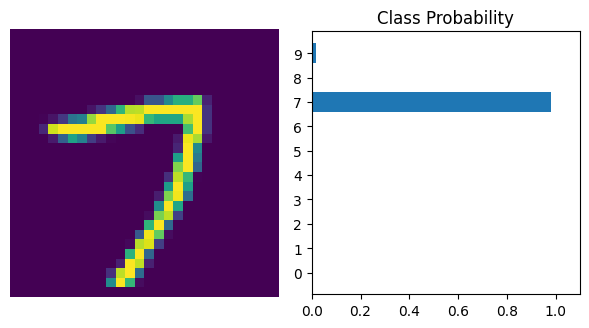

In [35]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Wyłącz gradienty, aby przyspieszyć tę część 
with torch.no_grad():
    logps = model(img)

# Dane wyjściowe sieci to logarytmiczne prawdopodobieństwa,
# Prawdopodobieństw należy wyznaczyć przy pomocy funkcji wykładniczej  
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

Teraz nasza sieć potrafi dokładnie przewidzieć cyfry na naszych obrazach. Na kolejnych zajęciach napiszemy kod do trenowania sieci neuronowej na bardziej złożonym zbiorze danych. 